## AMR + Unclassified Individuals

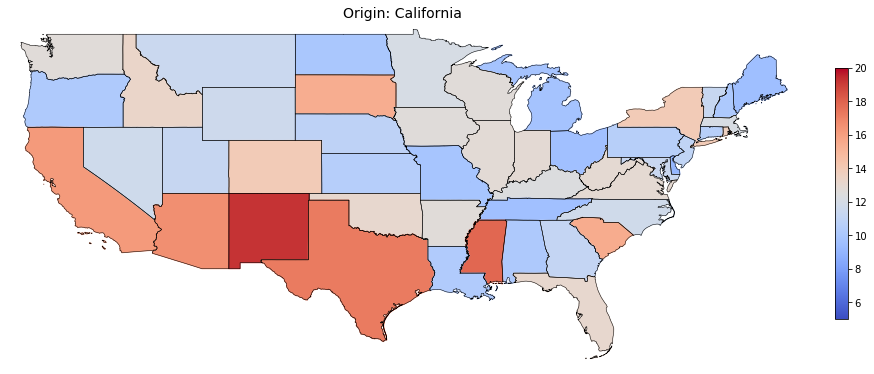

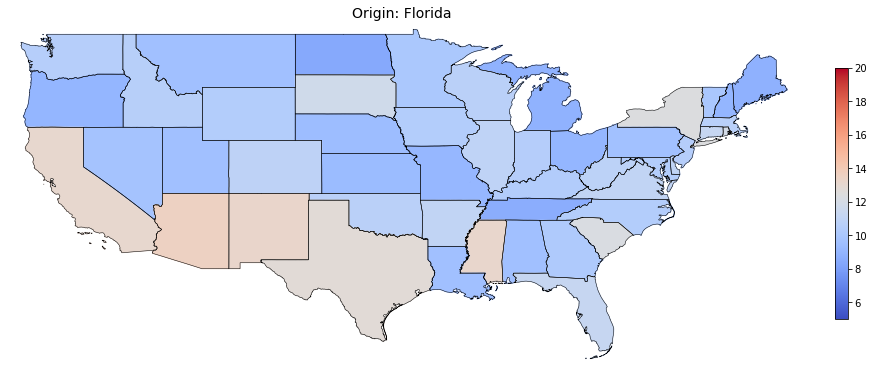

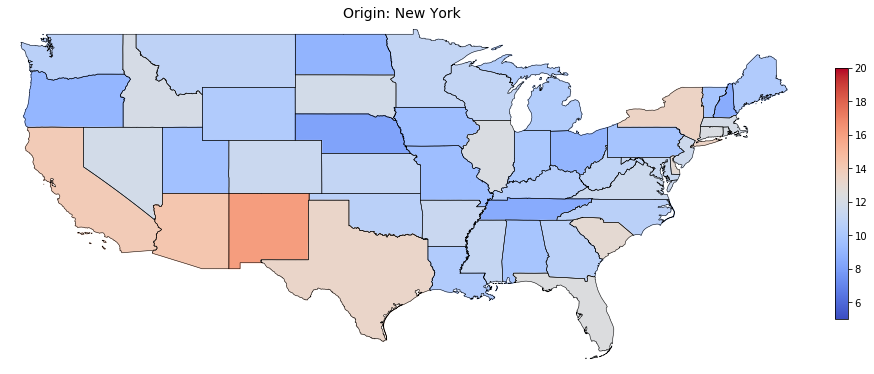

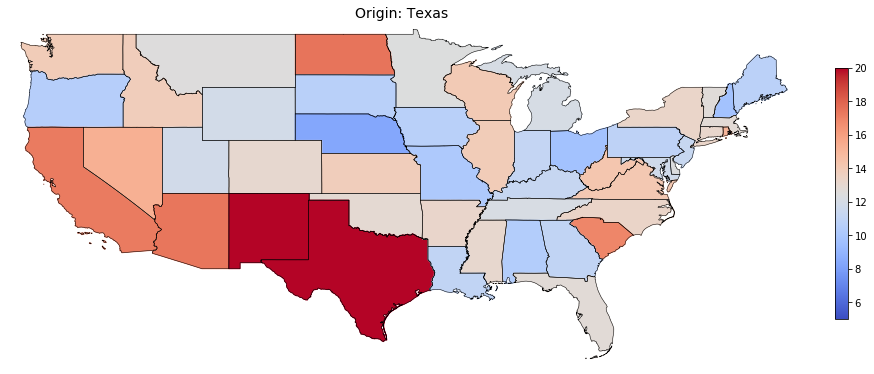

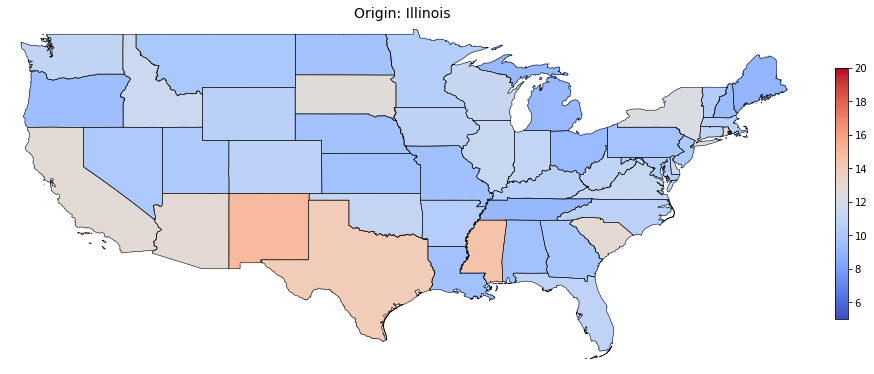

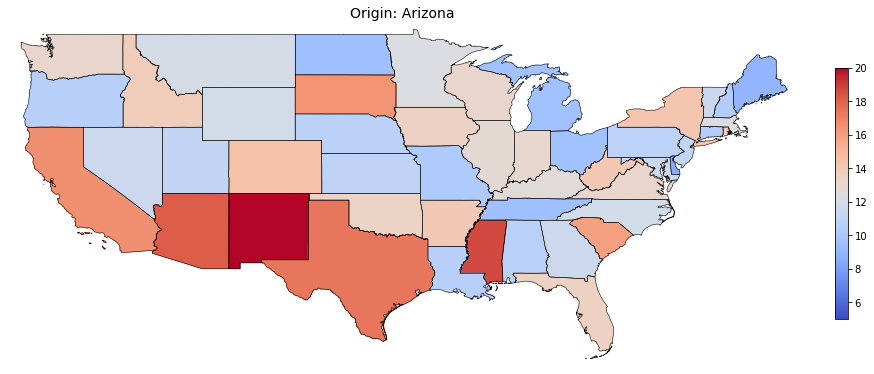

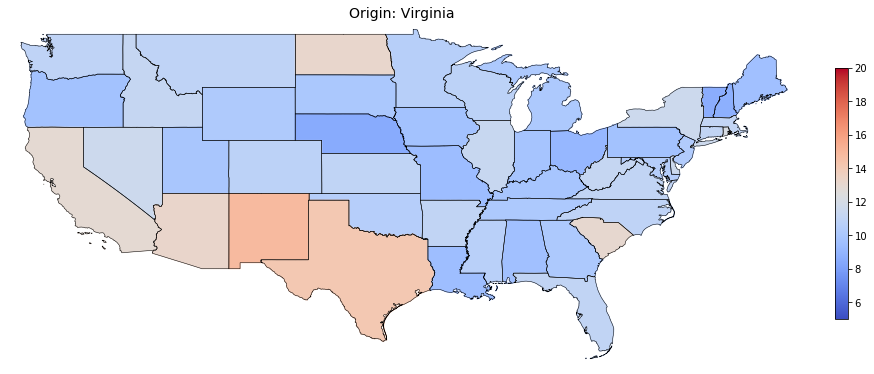

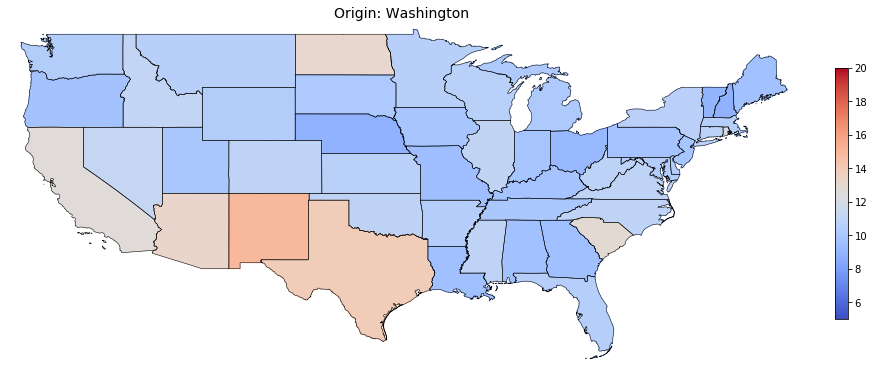

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.cm
import pandas, gzip
from us_map import *

fips_dict = {}
state_fips = {}
with open('/home/chengdai/NG/figures/us_map/NG_ind_zip_lat_long_fips.txt') as longlat_file:
    for line in longlat_file:
        ID, zipcode, lat, longi, fips = line.strip().split()
        state_fips[ID.strip()] = int(fips.strip()[:-3])

df_geo = []
with gzip.open('../subnetworks/NG_classified_AMR_oth_unrelated_contiguous_cumulative_ibd.txt.gz') as network:
    for line in network:
        id1, id2, tot_ibd = line.strip().split()
        df_geo.append([state_fips[id1], state_fips[id2], float(tot_ibd)])
        
df_geo = pandas.DataFrame(df_geo)
df_geo.columns = ['ID1_fips','ID2_fips','cum_IBD']
df_geo = df_geo.groupby(['ID1_fips','ID2_fips']).mean().reset_index()

amr_top = [6,  12, 36, 48, 17,  4, 51, 53]
for source_fips in amr_top:
    filtered = df_geo[(df_geo['ID1_fips'] == source_fips) | (df_geo['ID2_fips'] == source_fips)]

    #Build dictionary of cumulative IBD to other counties
    target_dict = {}
    for pair in filtered.values:
        if pair[0] == source_fips:
            target_dict[int(pair[1])] = pair[2]
        if pair[1] == source_fips:
            target_dict[int(pair[0])] = pair[2]

    #Plot Map

    lllon=-125.5
    lllat=24.2
    urlon=-66.5
    urlat=49.8
    ratio = float(urlat-lllat)/float(urlon - lllon)
    width = 15

    fig,MapAx = plt.subplots(figsize=(width, ratio*width))
    cmap = matplotlib.cm.get_cmap('coolwarm')
    #norm = matplotlib.colors.Normalize(min(target_dict.values()),max(target_dict.values()))
    norm = matplotlib.colors.Normalize(5,21)

    colors = []
    patches = []

    m = Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat)
    m.readshapefile('st99_d00', name='states', drawbounds=True)

    fips_name_dict = {}
    for i, seg in enumerate(m.states):
        name = m.states_info[i]['NAME']
        state = int(m.states_info[i]['STATE'])
        fips_name_dict[state] = name
        if state in target_dict:
            poly = Polygon(seg, facecolor=cmap(norm(target_dict[state])), edgecolor=cmap(norm(target_dict[state])))
            patches.append(poly)
            MapAx.add_patch(poly)

    p = PatchCollection(patches, cmap=cmap)
    #p.set_array(np.arange(min(target_dict.values()),max(target_dict.values()), 1))
    p.set_array(np.arange(5,21,1))
    cb = fig.colorbar(p, fraction=0.015,)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title('Origin: {0}'.format(fips_name_dict[source_fips]), {'fontsize':14})
    plt.show()
    plt.close()

## AFR + Unclassified Individuals

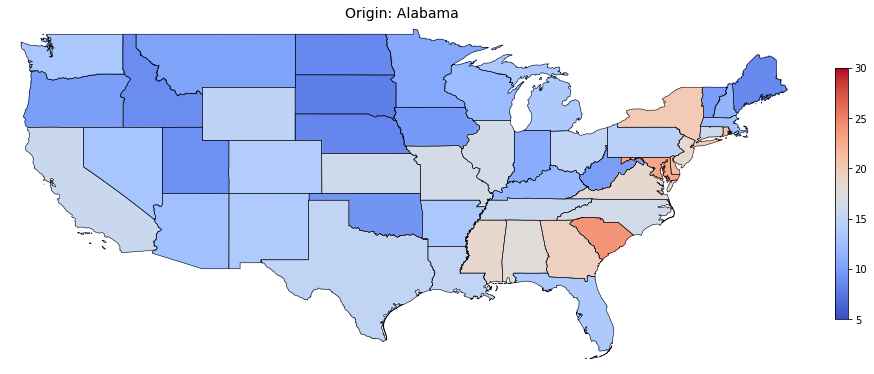

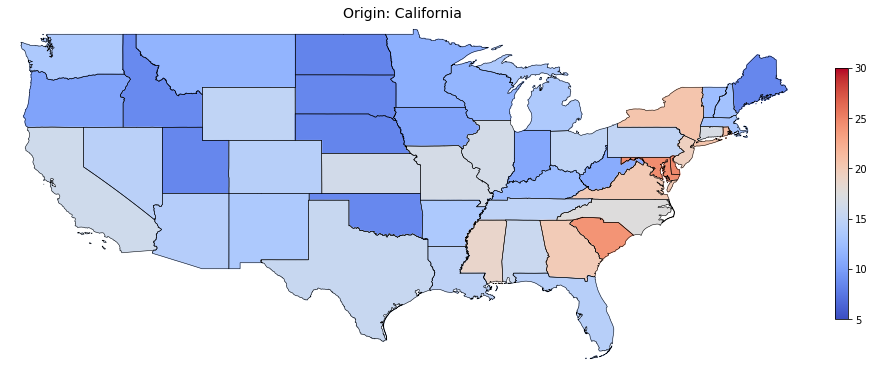

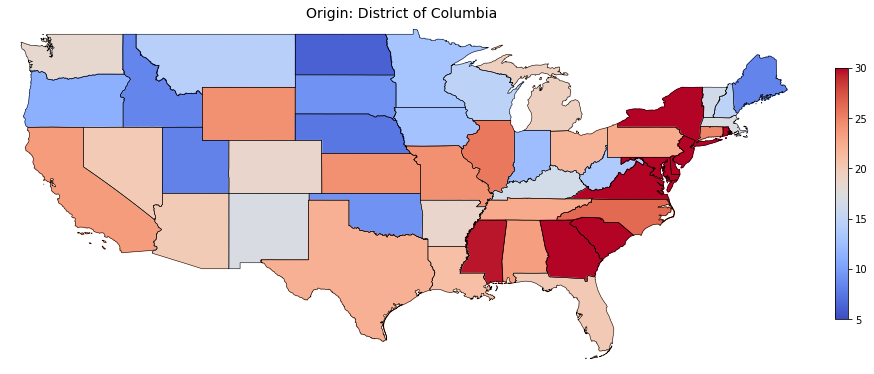

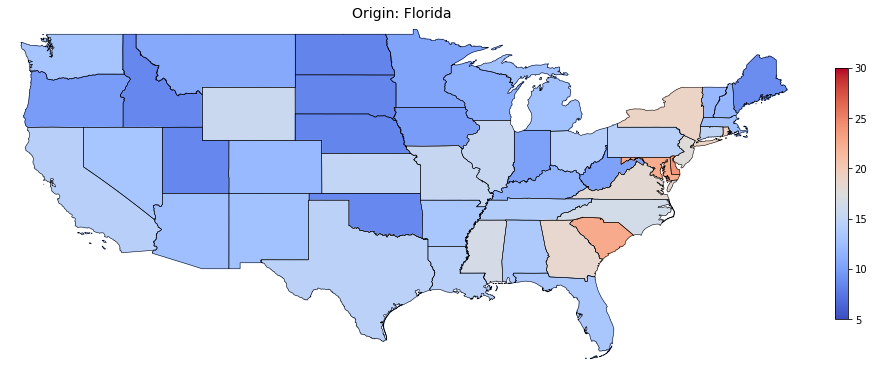

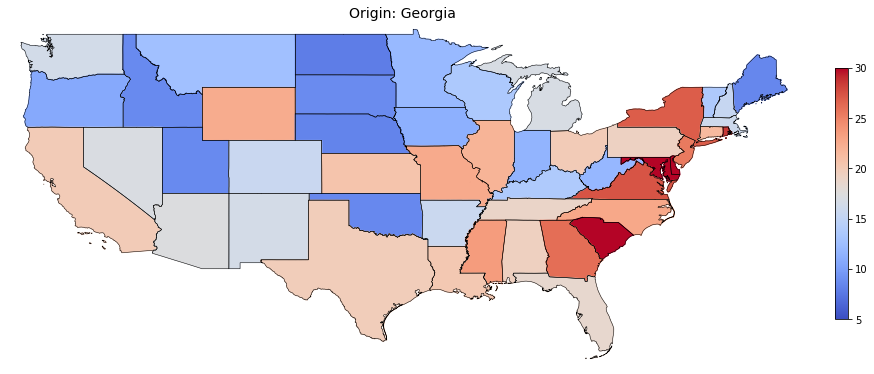

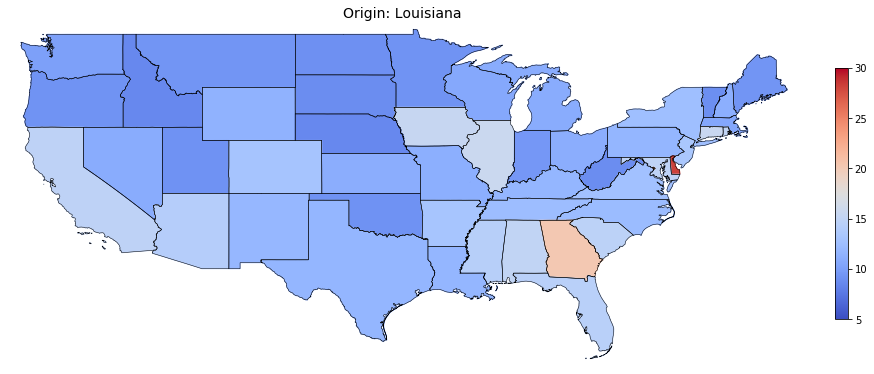

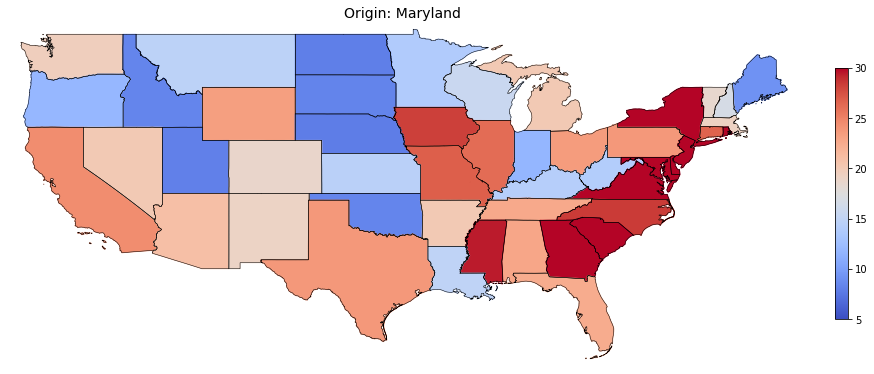

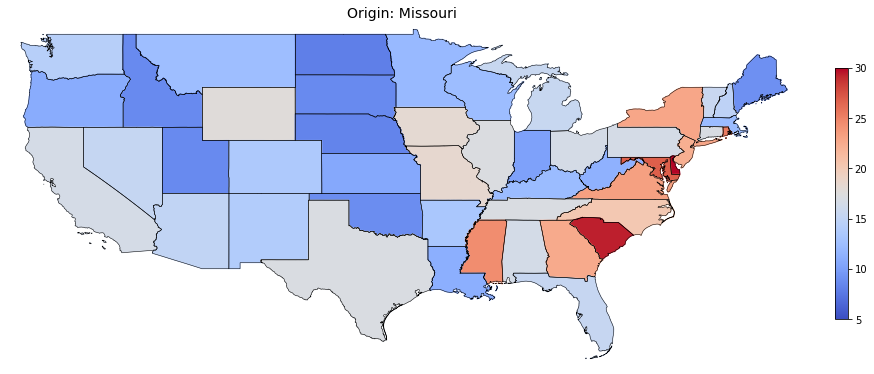

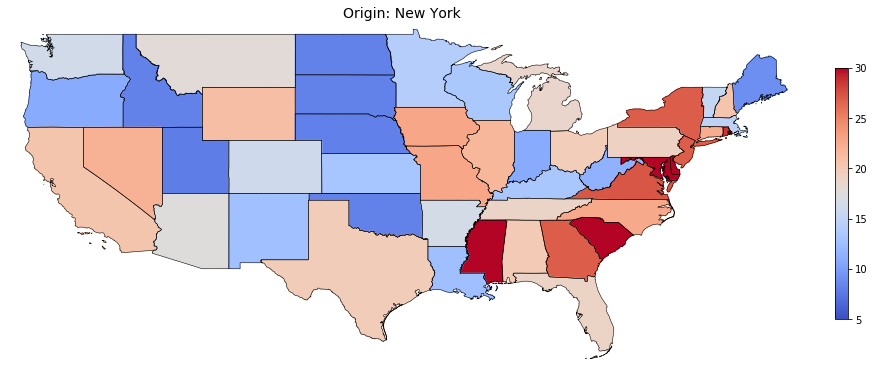

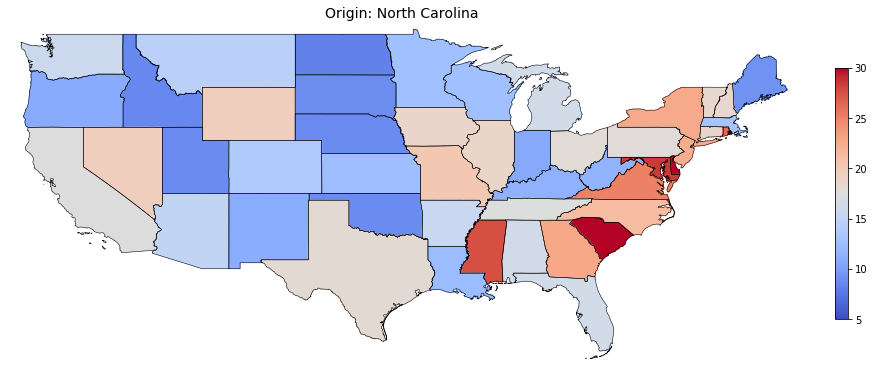

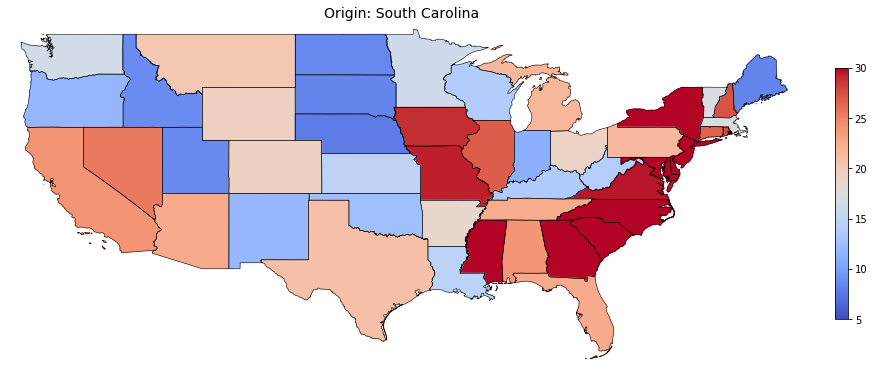

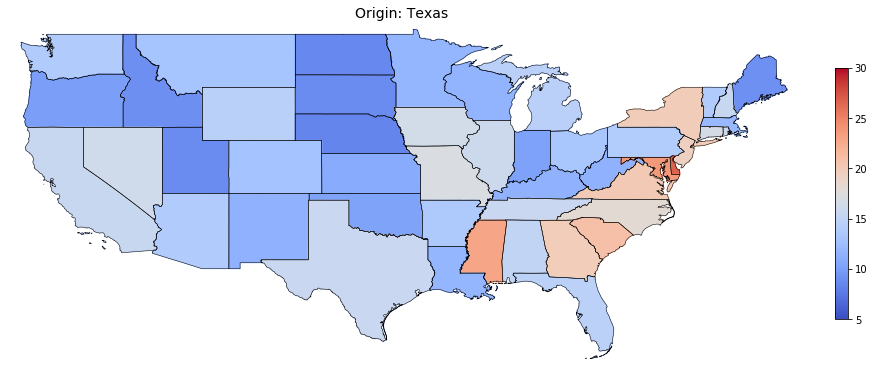

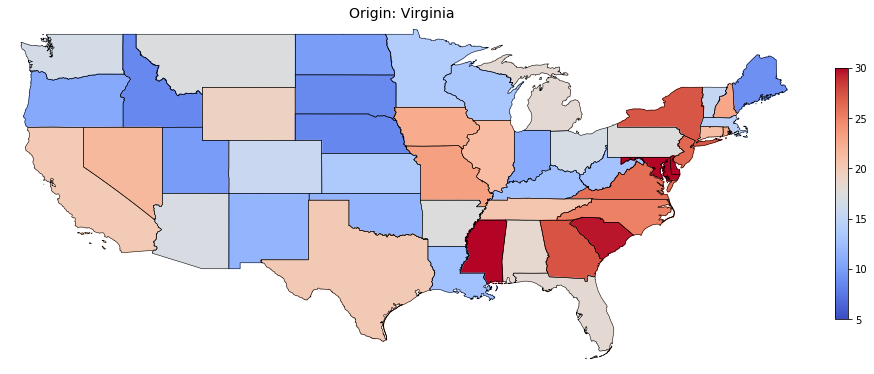

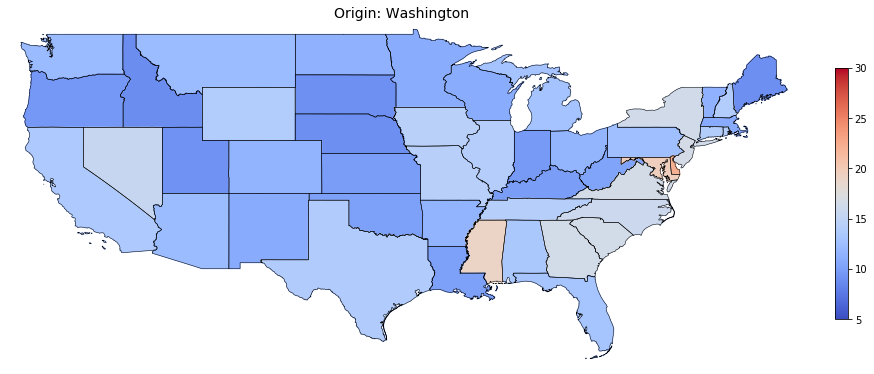

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.cm
import pandas, gzip
from us_map import *

fips_dict = {}
state_fips = {}
with open('/home/chengdai/NG/figures/us_map/NG_ind_zip_lat_long_fips.txt') as longlat_file:
    for line in longlat_file:
        ID, zipcode, lat, longi, fips = line.strip().split()
        state_fips[ID.strip()] = int(fips.strip()[:-3])

df_geo = []
state_counter = {}
with gzip.open('../subnetworks/NG_classified_AFR_oth_unrelated_contiguous_cumulative_ibd.txt.gz') as network:
    for line in network:
        id1, id2, tot_ibd = line.strip().split()
        df_geo.append([state_fips[id1], state_fips[id2], float(tot_ibd)])
        state_counter[state_fips[id1]] = state_counter.get(state_fips[id1], set([])).union([id1])
        state_counter[state_fips[id2]] = state_counter.get(state_fips[id2], set([])).union([id2])

for key in state_counter.keys():
    state_counter[key] = len(state_counter[key])

df_geo = pandas.DataFrame(df_geo)
df_geo.columns = ['ID1_fips','ID2_fips','cum_IBD']
df_geo = df_geo.groupby(['ID1_fips','ID2_fips']).mean().reset_index()

amr_top = [1, 5, 6, 10, 11, 12, 13, 22, 24, 28, 29, 36, 37, 45, 48, 51, 53]
for source_fips in amr_top:
    if state_counter[source_fips] < 20:
        continue
    
    filtered = df_geo[(df_geo['ID1_fips'] == source_fips) | (df_geo['ID2_fips'] == source_fips)]

    #Build dictionary of cumulative IBD to other counties
    unique_ids = set([])
    target_dict = {}
    for pair in filtered.values:
        if pair[0] == source_fips:
            target_dict[int(pair[1])] = pair[2]
        if pair[1] == source_fips:
            target_dict[int(pair[0])] = pair[2]

    #Plot Map

    lllon=-125.5
    lllat=24.2
    urlon=-66.5
    urlat=49.8
    ratio = float(urlat-lllat)/float(urlon - lllon)
    width = 15

    fig,MapAx = plt.subplots(figsize=(width, ratio*width))
    cmap = matplotlib.cm.get_cmap('coolwarm')
    norm = matplotlib.colors.Normalize(min(target_dict.values()),max(target_dict.values()))
    norm = matplotlib.colors.Normalize(5,31)

    colors = []
    patches = []

    m = Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat)
    m.readshapefile('st99_d00', name='states', drawbounds=True)

    fips_name_dict = {}
    for i, seg in enumerate(m.states):
        name = m.states_info[i]['NAME']
        state = int(m.states_info[i]['STATE'])
        fips_name_dict[state] = name
        if state in target_dict:
            poly = Polygon(seg, facecolor=cmap(norm(target_dict[state])), edgecolor=cmap(norm(target_dict[state])))
            patches.append(poly)
            MapAx.add_patch(poly)

    p = PatchCollection(patches, cmap=cmap)
    #p.set_array(np.arange(min(target_dict.values()),max(target_dict.values()), 1))
    p.set_array(np.arange(5,31, 1))
    cb = fig.colorbar(p, fraction=0.015,)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title('Origin: {0}'.format(fips_name_dict[source_fips]), {'fontsize':14})
    plt.show()
    plt.close()

## County Analysis

In [ ]:
import pandas, gzip
from us_map import *

fips_dict = {}
state_fips = {}
with open('/home/chengdai/NG/figures/us_map/NG_ind_zip_lat_long_fips.txt') as longlat_file:
    for line in longlat_file:
        ID, zipcode, lat, longi, fips = line.strip().split()
        fips_dict[ID.strip()] = int(fips.strip())

        
amr_top = [6037,  12086, 36061, 48029, 17031,  4013, 51059,  6075, 53033]
source_fips = amr_top[2]

ibd_sum_dict = {}
ibd_count_dict = {}
with gzip.open('../subnetworks/NG_classified_AMR_unrelated_contiguous_cumulative_ibd.txt.gz') as network:
    for line in network:
        id1, id2, tot_ibd = line.strip().split()
        #df_geo.append([fips_dict[id1], fips_dict[id2], float(tot_ibd)])
        if float(tot_ibd) > 12.0:
            if fips_dict[id1] == source_fips:
                ibd_sum_dict[fips_dict[id2]] = ibd_sum_dict.get(fips_dict[id2], 0) + float(tot_ibd)
                ibd_count_dict[fips_dict[id2]] = ibd_count_dict.get(fips_dict[id2], 0) + 1
            if fips_dict[id2] == source_fips:
                ibd_sum_dict[fips_dict[id1]] = ibd_sum_dict.get(fips_dict[id1], 0) + float(tot_ibd)
                ibd_count_dict[fips_dict[id1]] = ibd_count_dict.get(fips_dict[id1], 0) + 1
        
# df_geo = pandas.DataFrame(df_geo)
# df_geo.columns = ['ID1_fips','ID2_fips','cum_IBD']
# df_geo = df_geo.groupby(['ID1_fips','ID2_fips']).mean().reset_index()

# filtered = df_geo[(df_geo['ID1_fips'] == source_fips) | (df_geo['ID2_fips'] == source_fips)]

# #Build dictionary of cumulative IBD to other counties
# target_dict = {}
# for pair in filtered.values:
#     if pair[0] == source_fips:
#         target_dict[int(pair[1])] = pair[2]
#     if pair[1] == source_fips:
#         target_dict[int(pair[0])] = pair[2]

target_dict = {}
for loc in ibd_sum_dict.keys():
    target_dict[loc] = ibd_sum_dict[loc]/ibd_count_dict[loc]

county_data_folder = '/home/chengdai/NG/figures/us_map/county_data/ascii_files/'
d_county, county_lon_lat_bounds = combine_states(county_data_folder, 'county')
plot_map(d_county, target_dict, county_lon_lat_bounds, width = 20, color_map = 'coolwarm', pop_label = 'AMR')